In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

import astropy

In [ ]:
object_table_path = '/content/drive/MyDrive/Supernovas_ThesisSteve/Data/object_ALeRCExWiserep20240630_20240703.pkl'
object_table = pd.read_pickle(object_table_path)
object_table.head()

,oid,source_id,true_label,redshift,firstmjd,Av_MW
0,ZTF22abqtedd,SN 1990E,SN IIP,0.00414,60257.273299,0.0664
1,ZTF24aaekmnz,SN 2024yr,SN II,0.02,60351.498808,0.5448
2,ZTF24aabvtdh,SN 2024yq,SN Ia,0.04,60324.494931,0.1316
3,ZTF24aabplhb,SN 2024ym,SN Ia,0.038,60322.398276,0.0707
4,ZTF24aabuisb,2024xx,SN Ia,0.05437,60322.324630,0.0599


In [ ]:
spectra_alercexwiserep_path = '/content/drive/MyDrive/Supernovas_ThesisSteve/Data/spectra_ALeRCE20240801_x_wisrep_20240622.pkl'
spectra_alercexwiserep = pd.read_pickle(spectra_alercexwiserep_path)
spectra_alercexwiserep.head()

,oid,snname,instrument,mjd,lambda_grid_min,lambda_grid_max,nlambda_grid,lambda_data_min,lambda_data_max,flux_lambda,flux_lambda_smooth,e_flux_lambda
0,NaN,SN2022pru,Lick-3m_KAST,59788.215972,3206.34,10915.01,1838,3504.527001,10393.131809,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.21898910712578754, 0.1979063641775711, 0.18..."
1,NaN,SN2022ytx,LT_SPRAT,59886.979942,3206.34,10915.01,1838,4047.600000,7994.400000,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.2513674591903225, 0.2889965846960843, 0.113..."
2,NaN,SN2022ytx,LT_SPRAT,59907.898866,3206.34,10915.01,1838,4066.000000,7994.400000,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.12373791200226614, 0.10053409443820172, 0.1..."
3,NaN,SNLS-07D3do,Gemini-N_GMOS,54200.000000,3206.34,10915.01,1838,5104.440000,9352.610000,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.3293860421208932e-18, 1.3531363910393219e-1..."
4,NaN,SNLS-07D3do,Gemini-N_GMOS,54200.000000,3206.34,10915.01,1838,5048.346943,9355.344674,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[1.797687567656606e-18, 1.8212694935234954e-18..."


In [ ]:
def crossmatch_object_alerce(alerce_lc_table: pd.DataFrame, object_table: pd.DataFrame) -> pd.DataFrame:
    lightcurves = pd.merge(left=alerce_lc_table, right=object_table,
                       on='oid')
    return lightcurves

spectra = crossmatch_object_alerce(spectra_alercexwiserep, object_table)
spectra.oid.nunique(), spectra.columns, spectra.head()

(9264,
 Index(['oid', 'snname', 'instrument', 'mjd', 'lambda_grid_min',
        'lambda_grid_max', 'nlambda_grid', 'lambda_data_min', 'lambda_data_max',
        'flux_lambda', 'flux_lambda_smooth', 'e_flux_lambda', 'source_id',
        'true_label', 'redshift', 'firstmjd', 'Av_MW'],
       dtype='object'),
             oid      snname    instrument           mjd  lambda_grid_min  \
 0  ZTF18aahrzkb   SN2020xqj     P200_DBSP  59164.000000          3206.34   
 1  ZTF19abdyawn   SN2019kyy      P60_SEDM  58682.414919          3206.34   
 2  ZTF20actqnhg  SN2020aaxf   Other_Other  59190.058461          3206.34   
 3  ZTF19abzsjpn   SN2019qul      P60_SEDM  58750.348681          3206.34   
 4  ZTF20acbekkx   SN2020tyk  MMT_BINOSPEC  59140.000000          3206.34   
 
    lambda_grid_max  nlambda_grid  lambda_data_min  lambda_data_max  \
 0         10915.01          1838      3200.560090      9998.678015   
 1         10915.01          1838      3776.700000      9223.300000   
 2         1091

In [ ]:
spectra_snii = spectra.true_label.unique()
spectra_snii = [label for label in spectra_snii if 'SN II' in label]
spectra_snii = spectra[spectra.true_label.isin(spectra_snii)]
spectra_snii.shape, spectra_snii.true_label.unique(), spectra_snii.columns

((2676, 17),
 array(['SN II', 'SN IIb', 'SN IIn', 'SN IIP', 'SN II-pec', 'SN IIL',
        'SN IIn-pec'], dtype=object),
 Index(['oid', 'snname', 'instrument', 'mjd', 'lambda_grid_min',
        'lambda_grid_max', 'nlambda_grid', 'lambda_data_min', 'lambda_data_max',
        'flux_lambda', 'flux_lambda_smooth', 'e_flux_lambda', 'source_id',
        'true_label', 'redshift', 'firstmjd', 'Av_MW'],
       dtype='object'))

In [ ]:
absorption_lines = {
    'FeII':    5169, # Angstrom
    'H_beta':  4861, # Angstrom
    'H_alpha': 6563 # Angstrom
}

<ipython-input-36-155c06d2de6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectra_snii['redshift'] = pd.to_numeric(spectra_snii['redshift'], errors='coerce')
<ipython-input-36-155c06d2de6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spectrum.loc['flux_lambda_smooth'] = np.nan_to_num(spectrum.flux_lambda_smooth)


28.313801377373938


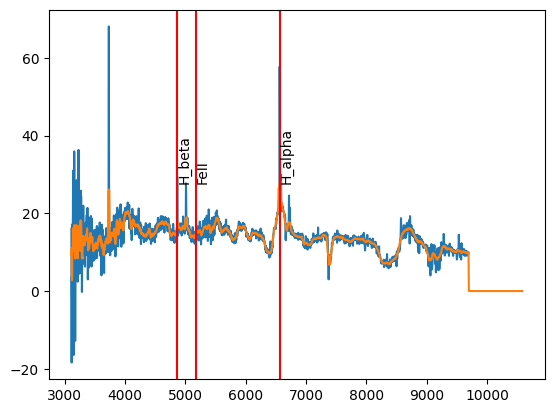

In [ ]:
spectra_snii['redshift'] = pd.to_numeric(spectra_snii['redshift'], errors='coerce')

idx = np.random.randint(0,spectra_snii.shape[0])
spectrum = spectra_snii.iloc[idx]
spectrum.loc['flux_lambda_smooth'] = np.nan_to_num(spectrum.flux_lambda_smooth)
wave_range = np.logspace(np.log10(spectrum.lambda_grid_min), np.log10(spectrum.lambda_grid_max), spectrum.nlambda_grid)
plt.plot(wave_range / (1 + spectrum.redshift), spectrum.flux_lambda, label='flux')
plt.plot(wave_range / (1 + spectrum.redshift), spectrum.flux_lambda_smooth, label='flux smooth')
print(np.max(spectrum.flux_lambda_smooth))
for line_name, line_wave in absorption_lines.items():
  plt.axvline(line_wave, color='red')
  plt.text(line_wave, max(spectrum.flux_lambda_smooth), line_name, rotation=90)
plt.show()